# Práctica: Arboles de Decisión con Sklearn y Python#

## Introducción##

*Prof. Jhon Jairo Padilla Aguilar, PhD.*

Los árboles de Decisión son una herramienta para clasificación.  En esta práctica se introduce la manera de trabajar los árboles de Decisión con Sklearn y Python. A continuación veremos cómo usar unos datos de prueba de flores del Sklearn para construir un árbol de decisión y probarlo.  Además se verá cómo hacer gráficos de las áreas 

## Procedimiento

Inicialmente, deben importarse las librerías de SkLearn y de gráficos.

In [2]:
#importar librerias de sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
#librerías de gráficos
import graphviz
import matplotlib.pyplot as plt
#libreria para graficar imagenes jpg o png
import matplotlib.image as mpimg
#librería para manejo de vectores y matrices
import numpy as np
#libreria para llamados al sistema operativo
import os

A continuación se cargan unos datos de prueba de una base de datos de iris de los ojos

In [3]:
iris=load_iris()

Ahora se dividen los datos en datos de entrenamiento y datos de prueba:

In [4]:
x_entrenamiento, x_test, y_entrenamiento, y_test=train_test_split(iris.data,iris.target)

Luego se entrena el algoritmo del árbol de decisión:

In [5]:
arbol=DecisionTreeClassifier()
arbol.fit(x_entrenamiento,y_entrenamiento)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Ahora viene la evaluación del porcentaje de aciertos con las pruebas y con los datos de entrenamiento:

In [6]:
arbol.score(x_test,y_test)
arbol.score(x_entrenamiento,y_entrenamiento)

1.0

Se observa que la prueba de ajuste está dando el 100%, lo cual no es bueno pues hay sobreajuste y entonces el clasificador no serviría sino para este conjunto de datos.   A continuación se genera la descripcion del arbol con graphviz en un archivo con extension dot:

In [ ]:
export_graphviz(arbol,out_file='arbol.dot',class_names=iris.target_names,
                feature_names=iris.feature_names,impurity=False,filled=True)
with open('arbol.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

Luego se genera un archivo jpg a partir del archivo dot:

In [8]:
os.system('dot -Tjpg -O  arbol.dot')

0

Y ahora se grafica el archivo jpg del árbol obtenido inicialmente:

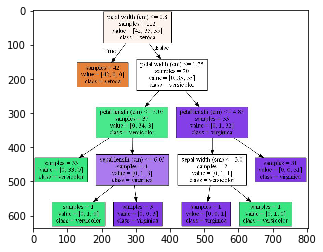

In [9]:
img=mpimg.imread('arbol.dot.jpg') 
imgplot = plt.imshow(img)
plt.show()

A continuación se construye gráfico de importancia de las caracteristicas con el fin de analizar la posible reducción del número de atributos a evaluar y obtener un árbol más simple y así reducir el sobreajuste:

[]

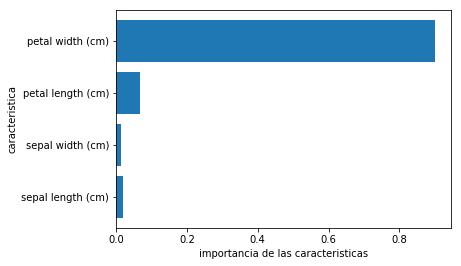

In [10]:
caract=iris.data.shape[1]
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('importancia de las caracteristicas')
plt.ylabel('caracteristica')
plt.plot()

Se obseva que los dos principales atributos, es decir, los que más variación tienen en los datos son el ancho del pétalo y la longitud del pétalo. Por tanto, ahora construye un arbol de solo 3 niveles de profundidad con el fin de reducir el sobreajuste, lo entrenamos y lo evaluamos nuevamente:

In [11]:
arbol3=DecisionTreeClassifier(max_depth=3)
arbol3.fit(x_entrenamiento,y_entrenamiento)
arbol3.score(x_test,y_test)
arbol3.score(x_entrenamiento,y_entrenamiento)

0.9821428571428571

Se observa que el ajuste se reduce a un 98%, reduciendo el sobreajuste. A continuación se genera la descripcion del arbol con graphviz en un archivo extension dot

In [ ]:
export_graphviz(arbol3,out_file='arbol3.dot',class_names=iris.target_names,
                feature_names=iris.feature_names,impurity=False,filled=True)
with open('arbol3.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

Se genera un archivo jpg a partir del archivo dot:

In [13]:
os.system('dot -Tjpg -O  arbol3.dot')

0

Nuevamente se imprime el archivo jpg con la descripción del árbol:

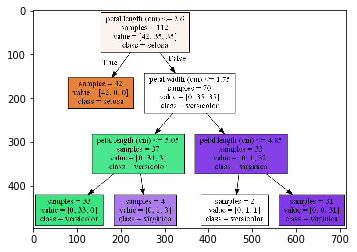

In [14]:
img=mpimg.imread('arbol3.dot.jpg') 
imgplot = plt.imshow(img) 
plt.show() 

Luego se grafican los resultados de la clasificacion:

In [ ]:
n_classes=3
plot_colors="bry"
plot_step=0.02
for pairidx,pair in enumerate([[0,1],[0,2],[0,3],
			      [1,2],[1,3],[2,3]]):
  x=iris.data[:,pair]
  y=iris.target
  #Entrenar el algoritmo
  clf=DecisionTreeClassifier(max_depth=3).fit(x,y)
  
  plt.subplot(2,3,pairidx+1)
  
  x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
  y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1
  xx, yy =np.meshgrid(np.arange(x_min, x_max, plot_step),
		      np.arange(y_min, y_max, plot_step))
  
  z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
  z=z.reshape(xx.shape)
  cs=plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
  
  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])
  plt.axis("tight")

imprimir los puntos según la clasificación obtenida con el árbol:

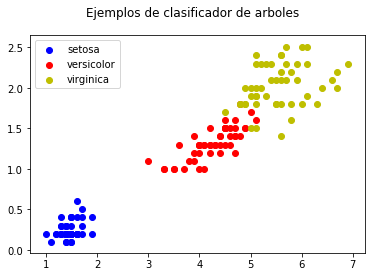

In [16]:
 for i, color in zip(range(n_classes), plot_colors):
    idx=np.where(y==i)
    plt.scatter(x[idx,0], x[idx,1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
    plt.axis("tight")

plt.suptitle("Ejemplos de clasificador de arboles")
plt.legend()
plt.show()

## Conclusión
Se observa que los puntos fueron clasificados según el árbol de tres niveles.  Para construir este árbol fue necesario entrenar el algoritmo, luego, debido a que la prueba de ajuste dió un 100%, fue necesario reducir el número de niveles del árbol para evitar el sobreajuste, obteniendo una clasificación con algunos errores pero que permite una mayor gama de datos de entrada.